<a href="https://colab.research.google.com/github/oklawyer71/ML1010_ClassExercies/blob/master/Day1/3_sentiment/Sentiment%20Analysis%20-%20Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary depencencies

In [1]:
import pandas as pd
import numpy as np
#import text_normalizer as tn
import model_evaluation_utils as meu

np.set_printoptions(precision=2, linewidth=80)

# Load and normalize data

In [2]:
dataset = pd.read_csv(r'movie_reviews_cleaned.csv')

# take a peek at the data
print(dataset.head())
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

# build train and test datasets
#train_reviews = reviews[:35000]
#train_sentiments = sentiments[:35000]
#test_reviews = reviews[35000:]
#test_sentiments = sentiments[35000:]

train_reviews = reviews[:5000]
train_sentiments = sentiments[:5000]
test_reviews = reviews[5000:7000]
test_sentiments = sentiments[5000:7000]

# normalize datasets
#norm_train_reviews = tn.normalize_corpus(train_reviews)
#norm_test_reviews = tn.normalize_corpus(test_reviews)

norm_train_reviews = train_reviews
norm_test_reviews = test_reviews

# print some sample normalized reviews

                                              review sentiment
0  not bother think would see movie great supspen...  negative
1  careful one get mitt change way look kung fu f...  positive
2  chili palmer tired movie know want success mus...  negative
3  follow little know 1998 british film make budg...  positive
4  dark angel cross huxley brave new world percys...  positive


# Traditional Supervised Machine Learning Models

## Feature Engineering

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [4]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [5]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (5000, 434563)  Test features shape: (2000, 434563)
TFIDF model:> Train features shape: (5000, 434563)  Test features shape: (2000, 434563)


## Model Training, Prediction and Performance Evaluation

In [6]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
#svm = SGDClassifier(loss='hinge')

svm = SGDClassifier(loss='hinge' , max_iter=100)

In [7]:
# Logistic Regression model on BOW features
lr_bow_predictions = meu.train_predict_model(classifier=lr,
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8605
Precision: 0.8606
Recall: 0.8605
F1 Score: 0.8605

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.85      0.86      0.86       981
    negative       0.87      0.86      0.86      1019

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        846      135
        negative        144      875


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = meu.train_predict_model(classifier=lr,
                                               train_features=tv_train_features, train_labels=train_sentiments,
                                               test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.866
Precision: 0.8661
Recall: 0.866
F1 Score: 0.866

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.87      0.85      0.86       981
    negative       0.86      0.88      0.87      1019

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        838      143
        negative        125      894


In [9]:
svm_bow_predictions = meu.train_predict_model(classifier=svm,
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.844
Precision: 0.8441
Recall: 0.844
F1 Score: 0.844

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.85      0.83      0.84       981
    negative       0.84      0.86      0.85      1019

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        816      165
        negative        147      872


In [10]:
svm_tfidf_predictions = meu.train_predict_model(classifier=svm,
                                                train_features=tv_train_features, train_labels=train_sentiments,
                                                test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8795
Precision: 0.8796
Recall: 0.8795
F1 Score: 0.8795

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.88      0.87      0.88       981
    negative       0.88      0.89      0.88      1019

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        853      128
        negative        113      906


# Newer Supervised Deep Learning Models

In [30]:
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder


# Add the following

import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer = ToktokTokenizer()
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')



ImportError: ignored

## Prediction class label encoding

In [14]:
le = LabelEncoder()
num_classes=2
# tokenize train reviews & encode train labels
tokenized_train = [tokenizer.tokenize(text)
                   for text in norm_train_reviews]
y_tr = le.fit_transform(train_sentiments)
y_train = keras.utils.to_categorical(y_tr, num_classes)
# tokenize test reviews & encode test labels
tokenized_test = [tokenizer.tokenize(text)
                   for text in norm_test_reviews]
y_ts = le.fit_transform(test_sentiments)
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [15]:
# print class label encoding map and encoded labels
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))
print('Sample test label transformation:\n'+'-'*35,
      '\nActual Labels:', test_sentiments[:3], '\nEncoded Labels:', y_ts[:3],
      '\nOne hot encoded Labels:\n', y_test[:3])

Sentiment class label map: {'negative': 0, 'positive': 1}
Sample test label transformation:
----------------------------------- 
Actual Labels: ['negative' 'negative' 'negative'] 
Encoded Labels: [0 0 0] 
One hot encoded Labels:
 [[1. 0.]
 [1. 0.]
 [1. 0.]]


## Feature Engineering with word embeddings

In [17]:
# build word2vec model
w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(tokenized_train, vector_size=w2v_num_features, window=150,
                                   min_count=10, sample=1e-3)

In [22]:
#change index2word to index_to_key
# Change model[word] to model.wv[word]

def averaged_word2vec_vectorizer(corpus, model, num_features):
  #vocabulary = set(model.wv.index2word)
    vocabulary = set(model.wv.index_to_key)

    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.

        for word in words:
            if word in vocabulary:
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [23]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=500)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=500)

In [24]:
# feature engineering with GloVe model
train_nlp = [nlp(item) for item in norm_train_reviews]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [nlp(item) for item in norm_test_reviews]
test_glove_features = np.array([item.vector for item in test_nlp])

In [25]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)
print('GloVe model:> Train features shape:', train_glove_features.shape, ' Test features shape:', test_glove_features.shape)

Word2Vec model:> Train features shape: (5000, 500)  Test features shape: (2000, 500)
GloVe model:> Train features shape: (5000, 96)  Test features shape: (2000, 96)


## Modeling with deep neural networks

### Building Deep neural network architecture

In [26]:
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(num_input_features,)))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(2))
    dnn_model.add(Activation('softmax'))

    dnn_model.compile(loss='categorical_crossentropy', optimizer='adam',
                      metrics=['accuracy'])
    return dnn_model

In [27]:
w2v_dnn = construct_deepnn_architecture(num_input_features=500)

### Visualize sample deep architecture

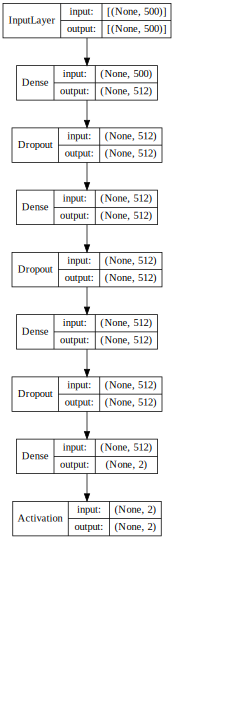

In [32]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(w2v_dnn, show_shapes=True, show_layer_names=False,
                 rankdir='TB').create(prog='dot', format='svg'))

### Model Training, Prediction and Performance Evaluation

In [33]:
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, y_train, epochs=5, batch_size=batch_size,
            shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/5
45/45 [==============================] - 2s 27ms/step - loss: 0.5039 - accuracy: 0.7584 - val_loss: 0.4902 - val_accuracy: 0.7520
Epoch 2/5
45/45 [==============================] - 1s 22ms/step - loss: 0.4618 - accuracy: 0.7820 - val_loss: 0.4705 - val_accuracy: 0.7840
Epoch 3/5
45/45 [==============================] - 1s 21ms/step - loss: 0.4454 - accuracy: 0.7931 - val_loss: 0.4629 - val_accuracy: 0.7620
Epoch 4/5
45/45 [==============================] - 1s 23ms/step - loss: 0.4431 - accuracy: 0.7962 - val_loss: 0.4515 - val_accuracy: 0.7880
Epoch 5/5
45/45 [==============================] - 1s 32ms/step - loss: 0.4328 - accuracy: 0.8038 - val_loss: 0.4459 - val_accuracy: 0.7800


In [37]:
y_pred = w2v_dnn.predict(avg_wv_test_features)
y_classes = np.argmax(y_pred, axis=1)
predictions = le.inverse_transform(y_classes)

63/63 [==============================] - 0s 7ms/step


In [38]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.802
Precision: 0.8022
Recall: 0.802
F1 Score: 0.802

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.79      0.81      0.80       981
    negative       0.81      0.79      0.80      1019

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        794      187
        negative        209      810


In [39]:
glove_dnn = construct_deepnn_architecture(num_input_features=96)

In [40]:
batch_size = 100
glove_dnn.fit(train_glove_features, y_train, epochs=5, batch_size=batch_size,
              shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/5
45/45 [==============================] - 2s 23ms/step - loss: 0.6719 - accuracy: 0.5840 - val_loss: 0.6545 - val_accuracy: 0.6080
Epoch 2/5
45/45 [==============================] - 1s 19ms/step - loss: 0.6537 - accuracy: 0.6158 - val_loss: 0.6517 - val_accuracy: 0.6080
Epoch 3/5
45/45 [==============================] - 1s 18ms/step - loss: 0.6438 - accuracy: 0.6220 - val_loss: 0.6348 - val_accuracy: 0.6340
Epoch 4/5
45/45 [==============================] - 1s 18ms/step - loss: 0.6329 - accuracy: 0.6462 - val_loss: 0.6360 - val_accuracy: 0.6320
Epoch 5/5
45/45 [==============================] - 1s 17ms/step - loss: 0.6216 - accuracy: 0.6604 - val_loss: 0.6299 - val_accuracy: 0.6500


In [43]:
y_pred = glove_dnn.predict(test_glove_features)
y_classes = np.argmax(y_pred, axis=1)
predictions = le.inverse_transform(y_classes)

63/63 [==============================] - 0s 5ms/step


In [44]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.65
Precision: 0.6562
Recall: 0.65
F1 Score: 0.6478

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.62      0.73      0.67       981
    negative       0.69      0.57      0.62      1019

    accuracy                           0.65      2000
   macro avg       0.66      0.65      0.65      2000
weighted avg       0.66      0.65      0.65      2000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        721      260
        negative        440      579
